# Data processing and Inspection

In [189]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#student id for random seed
STUNDENT_ID = 404488

#data paths
dataset_path = 'UCI HAR/dataset.txt'
feature_path = 'UCI HAR/features.txt'
targets_path = 'UCI HAR/targets.txt'

In [190]:
#loading features
feature_names = pd.read_csv(feature_path, sep=r'\s+', header = None, names=['feature_name'])
print(f'Num of features: {feature_names.shape[0]}')
feature_names.head()

Num of features: 561


,feature_name
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y


In [191]:
#load dataset
dataset = pd.read_csv(dataset_path, sep=r'\s+', header = None)
print(dataset.shape)

#assing feature names to dataset columns
dataset.columns = feature_names['feature_name'].values
dataset.head()

(10299, 561)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [192]:
#load targets
targets = pd.read_csv(targets_path, sep=r'\s+', header = None, names=['target'])
targets.shape

(10299, 1)

In [193]:
#check for missing or 0 values
missing_values = dataset.isnull().sum().sum()
print(f'Missing values: {missing_values}')

zero_values = (dataset == 0).sum().sum()
print(f'Zero values: {zero_values}')

Missing values: 0
Zero values: 804


In [194]:
#initial data exploration of first 5 features
dataset.iloc[:, 0:5].describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191
std,0.067628,0.037128,0.053033,0.438694,0.500240
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336
max,1.000000,1.000000,1.000000,1.000000,1.000000


target
6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: count, dtype: int64


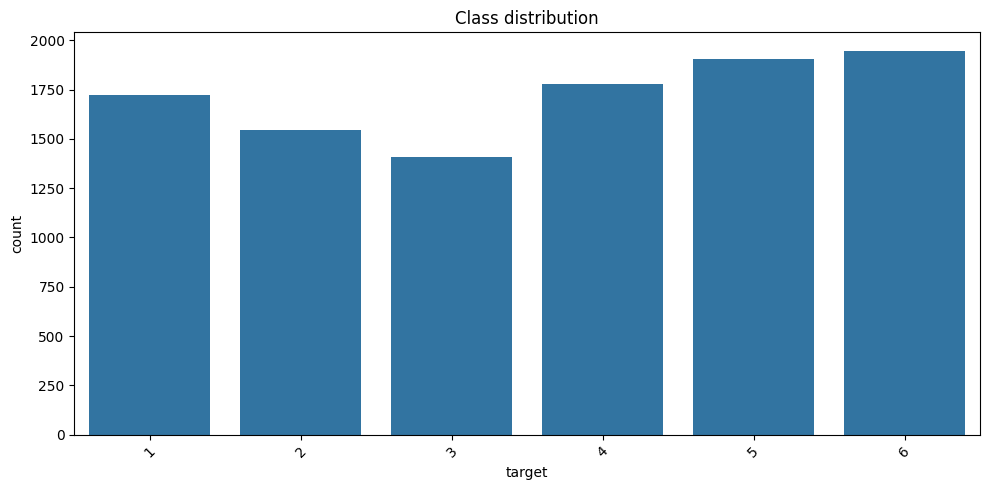

In [195]:
#data distribution
class_distribution = targets['target'].value_counts()
print(class_distribution)

#visulise class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=targets['target'])
plt.title('Class distribution')
plt.xlabel('target')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [196]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    dataset, 
    targets, 
    test_size=0.2, 
    random_state=STUNDENT_ID,
    stratify=targets['target'] #maintain distribution
)
#check shapes
print (f'Train data shape: {X_train.shape}')
print (f'Test data shape: {X_test.shape}')

Train data shape: (8239, 561)
Test data shape: (2060, 561)
